In [1]:
# TODO !

# # 3:
# Try 3 different number of components: 10, 20, 40 and then report the results
# when training on all emotions, try 10, 20, and 40
# when training on only two emotions, try a much smaller number
# report on this

# # General plots as stated in 4:
# Do k = 10, number of epochs = 50
# Plot average over the ten folds training and holdout loss
#     - for every 10 epochs, error bar for std
# Plot percent correct over 50 training epochs for training and holdou
# Average test loss and accuracy over 10 folds


# 5 c. 

# do the below for 3 (goldilock style) different learning rates
#     - generate a plot of loss for the 3 LR on one plot w/ std too

# then plots from #4 (for best lr)
# average loss and acc (for best lr)

# for one principal comp cal, show a figure of the first 4

# d. fear vs surprise for ALIGNED
# using best learning rate from part c,
# then plots from #4
# average loss and acc

# answer: does this differ from what we observed above? why?

# # 6: Softmax

In [2]:
from dataloader import Dataloader
from classifiers import LogisticRegression
from classifiers import SoftmaxRegression
from trainer import Trainer

import matplotlib.pyplot as plt
import numpy as np

## 5C: happiness vs anger on ALIGNED dataset

In [13]:
# lrs = [1e-1, 1e-4, 1e-8]
lrs = [1e-3]
for lr in lrs:
    num_epochs = 50
    num_pca_comps = 15
    k = 10
    dl = Dataloader("./facial_expressions_data/aligned/")
    emotions = ['anger', 'happiness']
    method = 'batch'
    cl = LogisticRegression()

    trainer = Trainer(cl, dl, emotions, method)
    train_eval, val_eval, test_eval = trainer.train(lr, num_epochs, num_pca_comps, k)

#     train_loss, train_acc = zip(*train_eval)
#     val_loss, val_acc = zip(*val_eval)
#     test_loss, test_acc = zip(*test_eval)

Emotions: ['fear', 'surprise', 'sadness', 'happiness', 'anger', 'disgust'] 

fear: 25 # of images
surprise: 83 # of images
sadness: 28 # of images
happiness: 69 # of images
anger: 45 # of images
disgust: 59 # of images

Balanced Set:
anger: 45 # of images
happiness: 45 # of images
Best on fold #1, epoch 3, loss: 0.008686942282153005    accuracy: 1.0
Best on fold #2, epoch 5, loss: 0.0007034743837297829    accuracy: 1.0
Best on fold #3, epoch 3, loss: 0.030755731612990136    accuracy: 0.7777777777777778
Best on fold #4, epoch 49, loss: 0.006488227686707401    accuracy: 1.0
Best on fold #5, epoch 8, loss: 0.021559908488738174    accuracy: 0.8888888888888888
Best on fold #6, epoch 32, loss: 0.03512517457202315    accuracy: 0.8888888888888888
Best on fold #7, epoch 3, loss: 0.00220561400045314    accuracy: 1.0
Best on fold #8, epoch 3, loss: 0.0016265031745477114    accuracy: 1.0
Best on fold #9, epoch 49, loss: 0.00021478184945236266    accuracy: 1.0
Best on fold #10, epoch 49, loss: 0.00

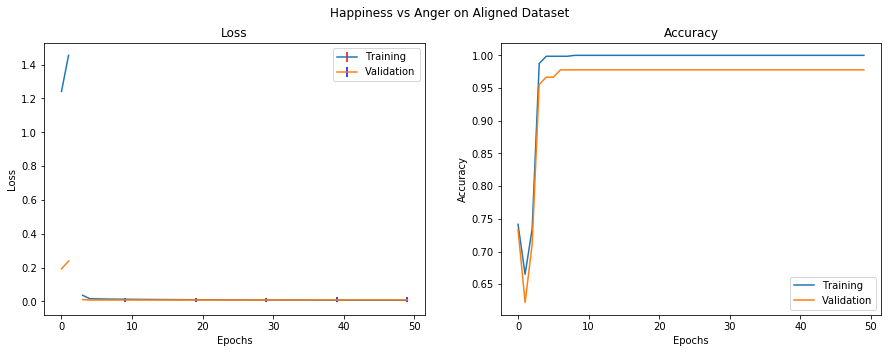

In [14]:
train_loss = [np.mean([train_eval[fold][epoch][0] for fold in range(10)]) for epoch in range(50)]
train_acc = [np.mean([train_eval[fold][epoch][1] for fold in range(10)]) for epoch in range(50)]

val_loss = [np.mean([val_eval[fold][epoch][0] for fold in range(10)]) for epoch in range(50)]
val_acc = [np.mean([val_eval[fold][epoch][1] for fold in range(10)]) for epoch in range(50)]

train_loss_std = np.zeros(50)
val_loss_std = np.zeros(50)
train_acc_std = np.zeros(50)
val_acc_std = np.zeros(50)
for epoch in [9, 19, 29, 39, 49]:
    train_loss_std[epoch] = np.std([train_eval[fold][epoch][0] for fold in range(10)])
    train_acc_std[epoch] = np.std([train_eval[fold][epoch][1] for fold in range(10)])
    
    val_loss_std[epoch] = np.std([val_eval[fold][epoch][0] for fold in range(10)])
    val_acc_std[epoch] = np.std([val_eval[fold][epoch][1] for fold in range(10)])

plot_title = "Happiness vs Anger on Aligned Dataset"
data = [[train_loss, val_loss], [train_acc, val_acc]]

sub_titles = ["Loss", "Accuracy"]
x_labels = ["Epochs" for i in range(len(data))]
y_labels = ["Loss", "Accuracy"]

fig, axs = plt.subplots(1,len(data), figsize=(15,5))
fig.suptitle(plot_title)

axs = axs.flatten()
for i in range(len(data)):
    axs[i].set_title(sub_titles[i])
    axs[i].set_xlabel(x_labels[i])
    axs[i].set_ylabel(y_labels[i])
    
    if i == 0:
        axs[i].errorbar(range(len(data[i][0])), data[i][0], train_loss_std, label="Training", color ='C0', ecolor='r', capthick=1)
        axs[i].errorbar(range(len(data[i][1])), data[i][1], val_loss_std, label="Validation", color ='C1', ecolor='b', capthick=1)
    elif i == 1:
        axs[i].plot(range(len(data[i][0])), data[i][0], label="Training")
        axs[i].plot(range(len(data[i][1])), data[i][1], label="Validation")
        
    axs[i].plot()
    axs[i].legend()
# print("Test Loss: {} Test Accuracy: {}".format(test_loss, test_acc))

In [ ]:
test_eval

## 5B: happiness vs anger on RESIZED dataset

In [ ]:
# WRITE A NON CROSS VALIDATION TRAIN

lr = 1e-4
num_epochs = 50
num_pca_comps = 15
k = 10
dl = Dataloader("./facial_expressions_data/resized/")
emotions = ['anger', 'happiness']
method = 'batch'
cl = LogisticRegression()

trainer = Trainer(cl, dl, emotions, method)
train_eval, val_eval, test_eval = trainer.no_cross_train(lr, num_epochs, num_pca_comps, k)

train_loss, train_acc = zip(*train_eval[0])
val_loss, val_acc = zip(*val_eval[0])
test_loss, test_acc = zip(*test_eval)

In [ ]:
# plots from #4, no std because not possible
    # training and validation loss
    # training and validation acc
    # test loss and acc

plot_title = "Happiness vs Anger on Resized Dataset"
data = [[train_loss, val_loss], [train_acc, val_acc]]
sub_titles = ["Loss", "Accuracy"]
x_labels = ["Epochs" for i in range(len(data))]
y_labels = ["Loss", "Accuracy"]

fig, axs = plt.subplots(1,len(data), figsize=(15,5))
fig.suptitle(plot_title)

axs = axs.flatten()
for i in range(len(data)):
    axs[i].set_title(sub_titles[i])
    axs[i].set_xlabel(x_labels[i])
    axs[i].set_ylabel(y_labels[i])
    axs[i].plot(range(len(data[i][0])), data[i][0], label="Training")
    axs[i].plot(range(len(data[i][1])), data[i][1], label="Validation")
    axs[i].legend()
print("Test Loss: {} Test Accuracy: {}".format(test_loss, test_acc))

In [ ]:
# then show first 4 principal components to show the poor results

eigen_vectors = trainer.dataloader.top_p_eig_vectors
fig, axs = plt.subplots(2, 2)
axs = axs.flatten()
fig.suptitle("Four Principal Components")
for i in range(4):
    eig_face = eigen_vectors[:,i].reshape(122,-1)
    axs[i].imshow(eig_face, cmap='gray')
plt.show()